# Support Vector Machine

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks, particularly by finding the optimal hyperplane to separate data points of different classes with maximum margin.

By maximizing this "margin", SVM aims to create a robust and generalizable boundary between classes, with the "support vectors" being the data points closest to this hyperplane that define its position.

#### How SVM Works

1. **The Hyperplane:** An SVM finds a hyperplane (a line in 2D, a plane in 3D, or a more complex boundary in higher dimensions) that best separates the different classes of data.
2. **Maximizing the Margin:** Among all possible hyperplanes, the SVM chooses the one that has the widest possible "margin" - the largest distance to the nearest data points of any class.
3. **Support Vectors:** The data points that lie on the edge of this margin are called support vectors. They are crucial because they determine the position and orientation of the separating hyperplane.
4. **Classification/Regression:** Once the optimal hyperplane is found, it is used to classify new, unseen data points into their respective classes. For regression, the objective is to fit a hyperplane that minimizes error while maintaining a certain distance from the data points.

### Key Applications

SVMs are versatile and have many real-world applications:

**Text Classification:**<br>
For tasks like spam detection, sentiment analysis, and topic modeling in natural language processing (NLP).

**Image and Speech Recognition:**<br>
Used in systems like Google Photos and Apple's Siri to recognize and categorize images and voices.

**Bio-informatics:**<br>
Applied in various biological applications due to their ability to handle high-dimensional data.

The following figure illustrates some elements of SVM:

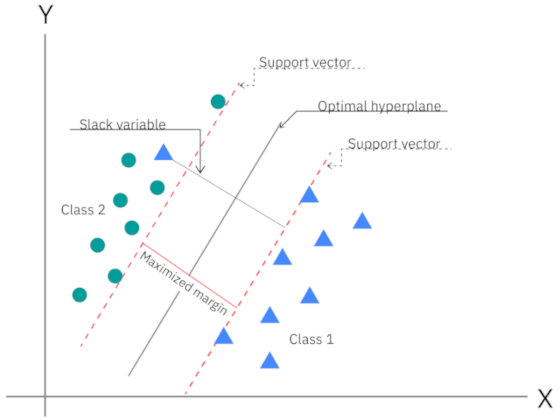

# Create Train Dataset and Test Dataset

## Load Dataset

We will use a dataset of movie review.

This dataset is used for binary sentiment classification.

The dataset contains two columns: "review" and "sentiment".

The values in the "sentiment" column can have one of two values: "positive" or "negative".

In [1]:
import pandas as pd

# csv file location
url = 'https://github.com/tariqzahratahdi/MachineLearning/raw/refs/heads/main/datasets/movies_reviews.csv'

# making dataframe from csv file
data = pd.read_csv(url)

# show dataframe
data

,review,sentiment
0,Interesting and short television movie describ...,negative
1,Insignificant and low-brained (haha!) 80's hor...,negative
2,"Ingrid Bergman, playing dentist Walter Matthau...",positive
3,Infamous horror films seldom measure up the hy...,negative
4,Independent film that would make Hollywood pro...,negative
...,...,...
1995,You remember the Spice Girls movie and how bad...,negative
1996,You should never ever even consider to watch t...,negative
1997,You wear only the best Italian suits from Arma...,positive
1998,You'd think you're in for some serious sightse...,positive


## Check Dataset is Balanced

Check that the dataset contains the same number of rows with the value "positive" than with "negative" in the column "setiment".

In [2]:
data.value_counts('sentiment')

,count
sentiment,
negative,1000
positive,1000


## Splitting Data into Train and Test

### Import Libraries

In [3]:
# import sklearn train_test_split
from sklearn.model_selection import train_test_split

### Create Train and Test Dataframes


In [4]:
# create train and test dataframes
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42)

# show train dataframe
data_train

,review,sentiment
1738,"This movie is very violent, yet exciting with ...",negative
548,Gilmore Girls is a hilarious show with never e...,positive
936,1 thing. this movie sucks BIG TIME..i was into...,negative
1389,The above line sums it up pretty good. The bes...,positive
1607,"This is a great ""small"" film. I say ""small"" be...",positive
...,...,...
1130,Must have to agree with the other reviewer. Th...,negative
1294,"Resnais, wow! The genius who brought us Hirosh...",negative
860,Absolutely nothing is redeeming about this tot...,negative
1459,"The movie with its single set, minimal cast, a...",positive


## Set Predictor Variable and Response Variable

In [5]:
# set predictor variable and response variable
X_train, y_train = data_train['review'], data_train['sentiment']
X_test, y_test = data_test['review'], data_test['sentiment']

# show predictor variable dataframe
X_train

,review
1738,"This movie is very violent, yet exciting with ..."
548,Gilmore Girls is a hilarious show with never e...
936,1 thing. this movie sucks BIG TIME..i was into...
1389,The above line sums it up pretty good. The bes...
1607,"This is a great ""small"" film. I say ""small"" be..."
...,...
1130,Must have to agree with the other reviewer. Th...
1294,"Resnais, wow! The genius who brought us Hirosh..."
860,Absolutely nothing is redeeming about this tot...
1459,"The movie with its single set, minimal cast, a..."


# Turn Text Data into Numerical Vectors

## Create an instance of `TfidfVectorizer`

### Import Library and Create an Instance of `TfidfVectorizer`

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

### Transform Text into Sparse Matrix

We use the `tfidf.fit_transform()` method to create a model and tranform train data into a sparse matrix the first time.

After that, we use the `tfidf.transform()` method to tranform test data into a sparse matrix.

In [7]:
# transform train text into sparse matrix
X_train_vector = tfidf.fit_transform(X_train)

# transform test text into sparse matrix
X_test_vector = tfidf.transform(X_test)  # use transform() instead of fit_tranform()

X_train_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 132712 stored elements and shape (1500, 21769)>

# Create an Instance of SVC Class

**`sklearn.svm.SVC`** is a class within the `sklearn.svm` module in the `scikit-learn` library, implementing Support Vector Classification.

It is a powerful and versatile algorithm used for both binary and multi-class classification tasks.

#### Usage:

* **Import:** Import the `SVC` class:<br>
`from sklearn.svm import SVC`
* **Initialization:** Create an instance of SVC, specifying desired parameters, for example:<br>
`SVC(kernel='linear'`)
* **Training:** Train the model using the fit method with training data and labels:<br>
`model.fit(X_train, y_train)`
* **Prediction:** Make predictions on new data using the predict method:<br>
`predictions = model.predict(X_test)`
* Probability Estimation (if enabled): Get class probabilities using predict_proba:<br>
`probabilities = model.predict_proba(X_test)`


In [8]:
# import SVC
from sklearn.svm import SVC

# create an SVC model: an insatnce of SVC
svc_model = SVC(kernel='linear')

## Train the Model

In [9]:
# train the model
svc_model.fit(X_train_vector, y_train)

SVC(kernel='linear')

## Make Predictions

#### Example

Make prediction with unseen data:

In [10]:
# make prediction
svc_model.predict(tfidf.transform(['a good movie']))

array(['positive'], dtype=object)

In [11]:
# make prediction
svc_model.predict(tfidf.transform(['a bad movie']))

array(['negative'], dtype=object)

### Make Prediction with Test Data

In [12]:
prediction_test = svc_model.predict(tfidf.transform(X_test))

print(type(prediction_test))
print(prediction_test.shape)

<class 'numpy.ndarray'>
(500,)


#### Show Prediction Data

In [13]:
# create a dataframe from ndarray
data_prediction = pd.DataFrame({'prediction':prediction_test})

data_prediction

,prediction
0,positive
1,negative
2,negative
3,positive
4,positive
...,...
495,negative
496,positive
497,negative
498,positive


#### Show Actual Data Versus Predicted Data

We will concatenate the target test dataframe `y_test` and the prediction dataframe `data_prediction`.

In order to perform correctly the concatenation, we need to reset the index of the target test dataframe.

**Reset the index of the target test dataframe**

In [15]:
# reset index to start from 0
y_test.reset_index(drop=True, inplace=True)

y_test

,sentiment
0,negative
1,positive
2,negative
3,positive
4,negative
...,...
495,negative
496,positive
497,negative
498,positive


**Concatenate the target test dataframe and the prediction dataframe**

In [16]:
# actual data vs prediction
actual_vs_prediction = pd.concat([y_test, data_prediction], axis=1)

actual_vs_prediction

,sentiment,prediction
0,negative,positive
1,positive,negative
2,negative,negative
3,positive,positive
4,negative,positive
...,...,...
495,negative,negative
496,positive,positive
497,negative,negative
498,positive,positive


#### Calculate Successful Predictions Ratio

In [18]:
# extract successful predictions
prediction_sucess = actual_vs_prediction[actual_vs_prediction['sentiment']
                                         == actual_vs_prediction['prediction']]

# calculate successful predictions ratio
prediction_sucess.shape[0] / actual_vs_prediction.shape[0]

0.83